In [99]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [100]:
data=pd.read_csv("C:\\Users\\Nishanth S\\Downloads\\Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [101]:
data.rename(columns={'Genre':'Gender'},inplace=True)

In [102]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [103]:
data.drop(['CustomerID'],axis=1,inplace=True)

In [104]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [105]:
data.shape

(200, 4)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [107]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [108]:
data.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [109]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

C:\Users\Nishanth S\AppData\Local\Temp\ipykernel_4440\2169105468.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i] , bins=20)
C:\Users\Nishanth S\AppData\Local\Temp\ipykernel_4440\2169105468.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i] , bins=20)
C:\Users\Nishanth S\AppD

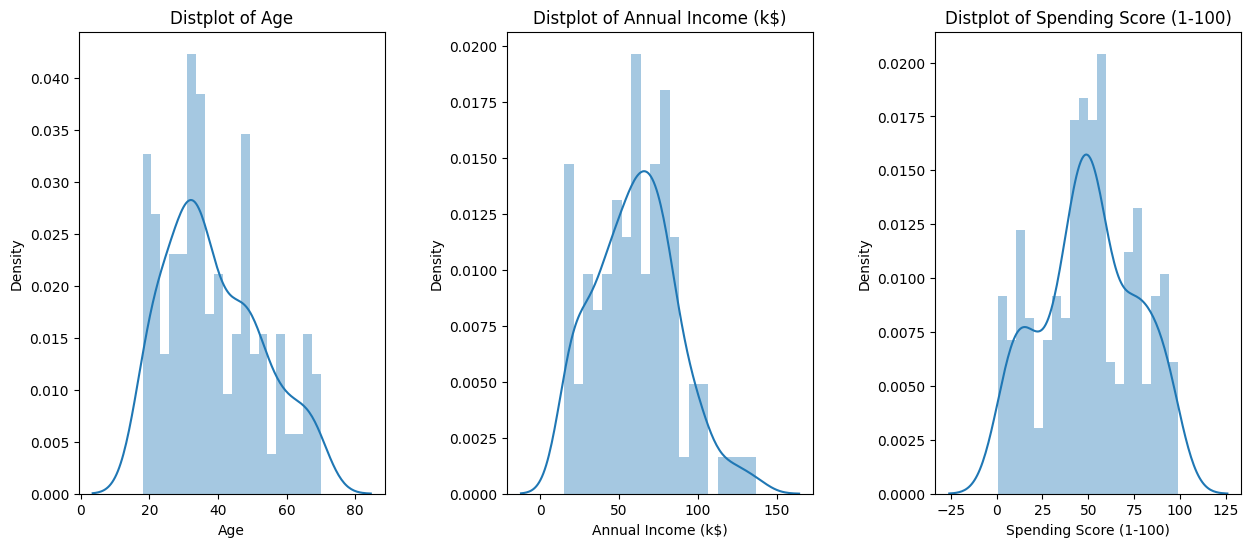

In [110]:
plt.figure(1,figsize=(15,6))
n=0
for i in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n +=1
    plt.subplot(1 , 3 ,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.4)
    sns.distplot(data[i] , bins=20)
    plt.title(f"Distplot of {i}")
plt.show()

dataset have majority of customers having age between 30-35

dataset have majority of customers having annual income of range between 50 -70

dataset have majority of customers having spending score of 50


<Axes: xlabel='count', ylabel='Gender'>

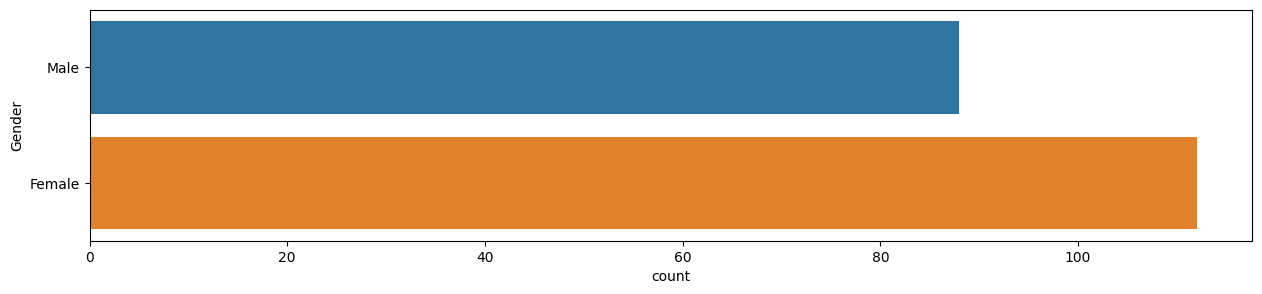

In [111]:
plt.figure(figsize=(15,3))
sns.countplot(y='Gender',data=data)

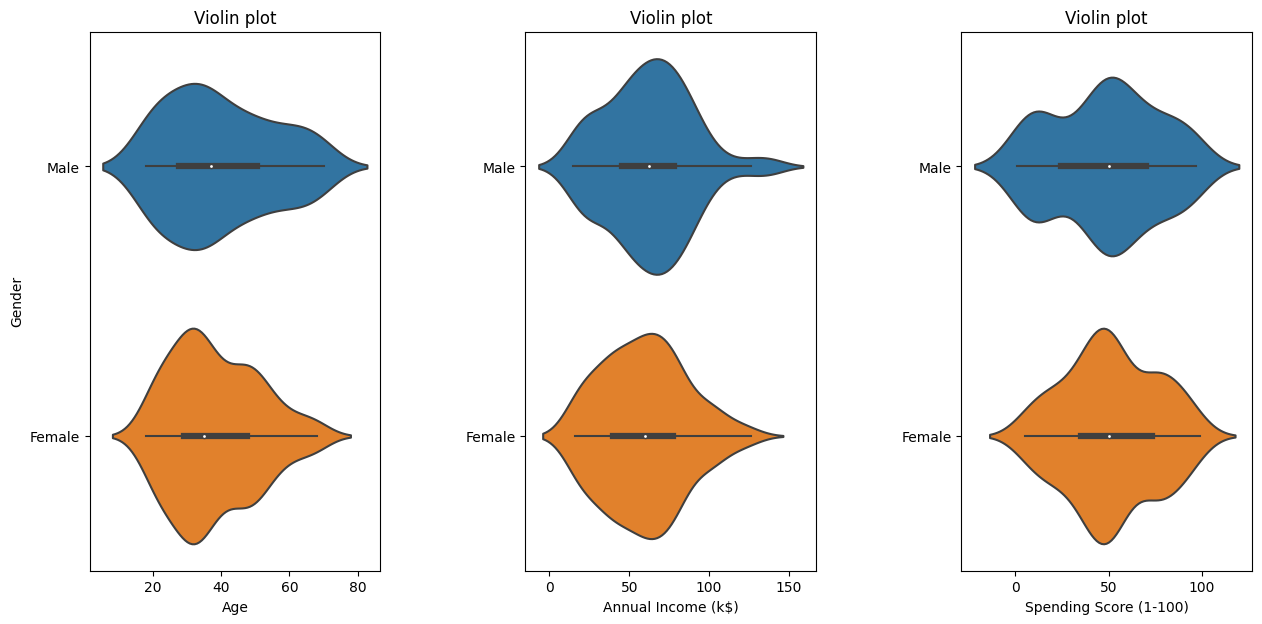

In [112]:
plt.figure(figsize=(15,7))
n=0
for i in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=i,y='Gender',data=data)
    plt.ylabel('Gender' if n==1 else'')
    plt.title("Violin plot")
plt.show() 

In [113]:
age_18_25 = data.Age[(data.Age>=18)&(data.Age<=25)]
age_18_25.count()

38

In [114]:
age_26_35=data.Age[(data.Age>=26)&(data.Age<=35)]
age_26_35.count()

60

In [115]:
age_36_45=data.Age[(data.Age>=36)&(data.Age<=45)]
age_36_45.count()

36

In [116]:
age_46_55=data.Age[(data.Age>=46)&(data.Age<=55)]
age_46_55.count()

37

In [117]:
age_55above=data.Age[data.Age>=56]
age_55above.count()

29

In [118]:
print(age_18_25.count()+age_26_35.count()+age_36_45.count()+age_46_55.count()+age_55above.count())

200


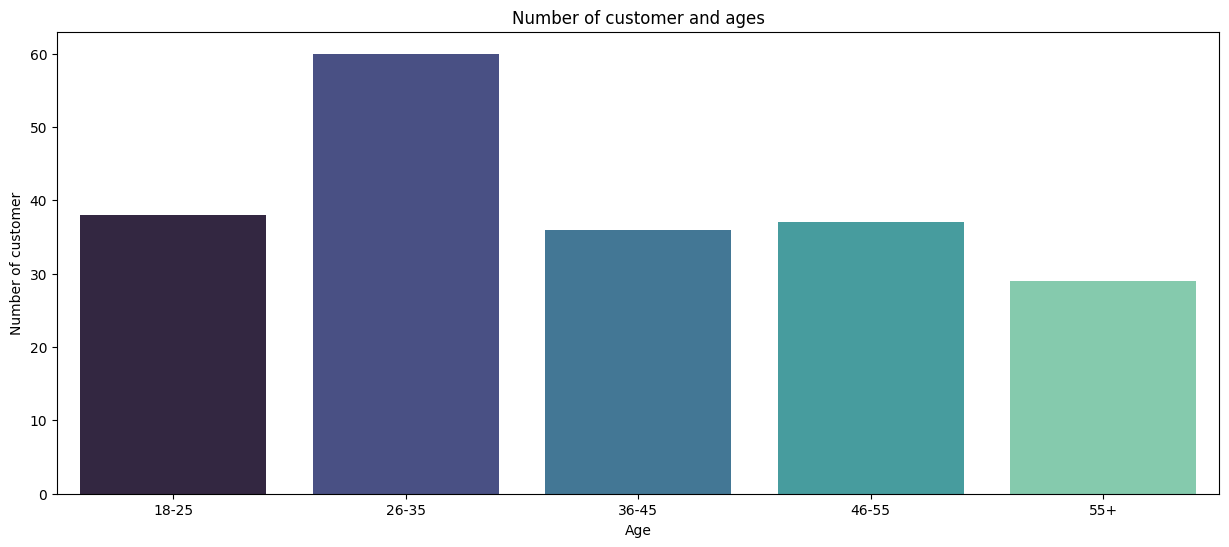

In [119]:
agex=['18-25','26-35','36-45','46-55','55+']
agey=[len(age_18_25),len(age_26_35),len(age_36_45),len(age_46_55),len(age_55above)]
plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey,palette='mako')
plt.title('Number of customer and ages')
plt.xlabel('Age')
plt.ylabel('Number of customer')
plt.show()

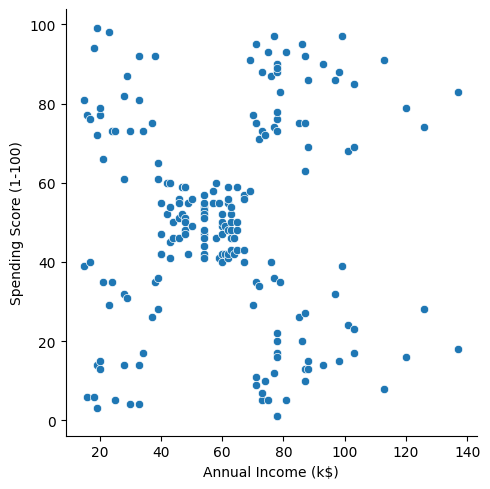

In [120]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data)

In [121]:
ss_1_20 = data['Spending Score (1-100)'][(data['Spending Score (1-100)']>=1) & (data['Spending Score (1-100)']<=20)]
ss_21_40 = data['Spending Score (1-100)'][(data['Spending Score (1-100)']>=21) & (data['Spending Score (1-100)']<=40)]
ss_41_60 = data['Spending Score (1-100)'][(data['Spending Score (1-100)']>=41) & (data['Spending Score (1-100)']<=60)]
ss_61_80 = data['Spending Score (1-100)'][(data['Spending Score (1-100)']>=61) & (data['Spending Score (1-100)']<=80)]
ss_81_100 = data['Spending Score (1-100)'][(data['Spending Score (1-100)']>=81) & (data['Spending Score (1-100)']<=100)]



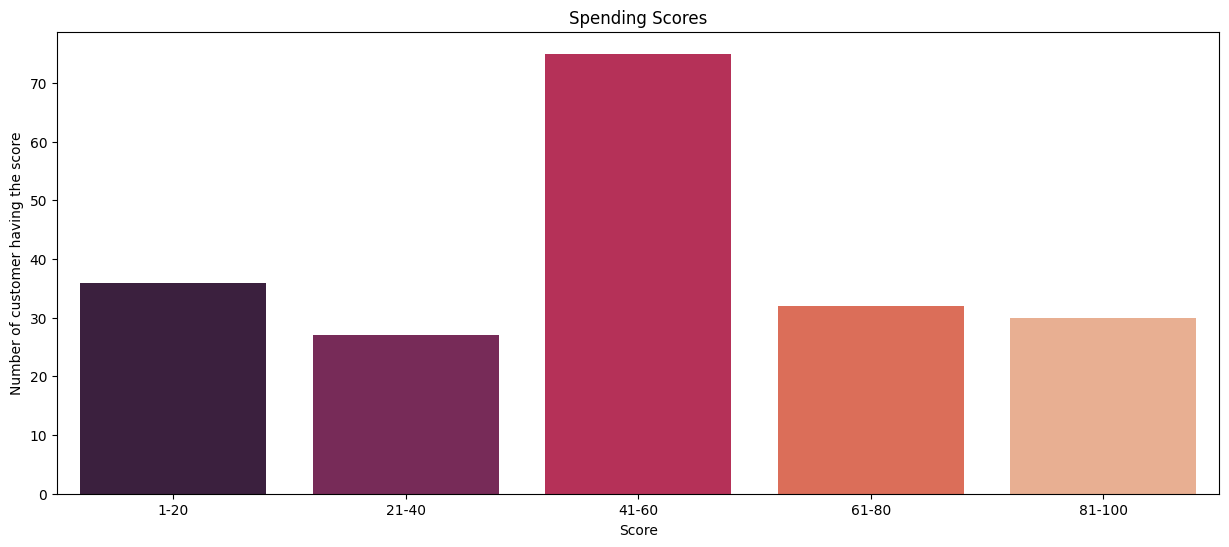

In [122]:
ssx=['1-20','21-40','41-60','61-80','81-100']
ssy=[len(ss_1_20),len(ss_21_40),len(ss_41_60),len(ss_61_80),len(ss_81_100)]
plt.figure(figsize=(15,6))
sns.barplot(x=ssx,y=ssy,palette='rocket')
plt.title("Spending Scores")
plt.xlabel('Score')
plt.ylabel('Number of customer having the score')
plt.show()

In [123]:
ai0_30=data['Annual Income (k$)'][(data['Annual Income (k$)']>=1)&(data['Annual Income (k$)']<=30)]
ai31_60=data['Annual Income (k$)'][(data['Annual Income (k$)']>=31)&(data['Annual Income (k$)']<=60)]
ai61_90=data['Annual Income (k$)'][(data['Annual Income (k$)']>=61)&(data['Annual Income (k$)']<=90)]
ai91_120=data['Annual Income (k$)'][(data['Annual Income (k$)']>=91)&(data['Annual Income (k$)']<=120)]
ai121_150=data['Annual Income (k$)'][(data['Annual Income (k$)']>=121)&(data['Annual Income (k$)']<=150)]


In [124]:
aix=['k$ 0-30','k$ 31-60','k$ 61-90','k$ 91-120','k$ 121-150']
aiy=[len(ai0_30),len(ai31_60),len(ai61_90),len(ai91_120),len(ai121_150)]


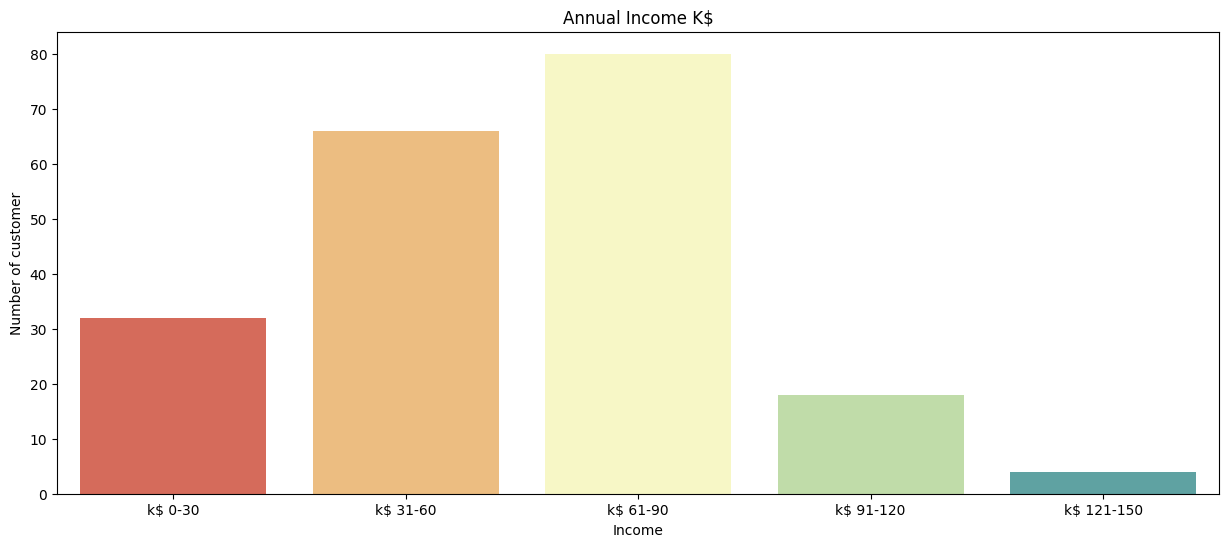

In [125]:
plt.figure(figsize=(15,6))
sns.barplot(x=aix,y=aiy,palette='Spectral')
plt.title("Annual Income K$")
plt.xlabel("Income")
plt.ylabel('Number of customer')
plt.show()

In [126]:
x1=data.loc[:,['Age','Spending Score (1-100)']].values
wcss=[]
k_range=range(1,11)
for k in k_range:
    km=KMeans(n_clusters=k,init='k-means++')
    km.fit(x1)
    wcss.append(km.inertia_)
    


c:\Users\Nishanth S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Nishanth S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Nishanth S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Nishanth S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

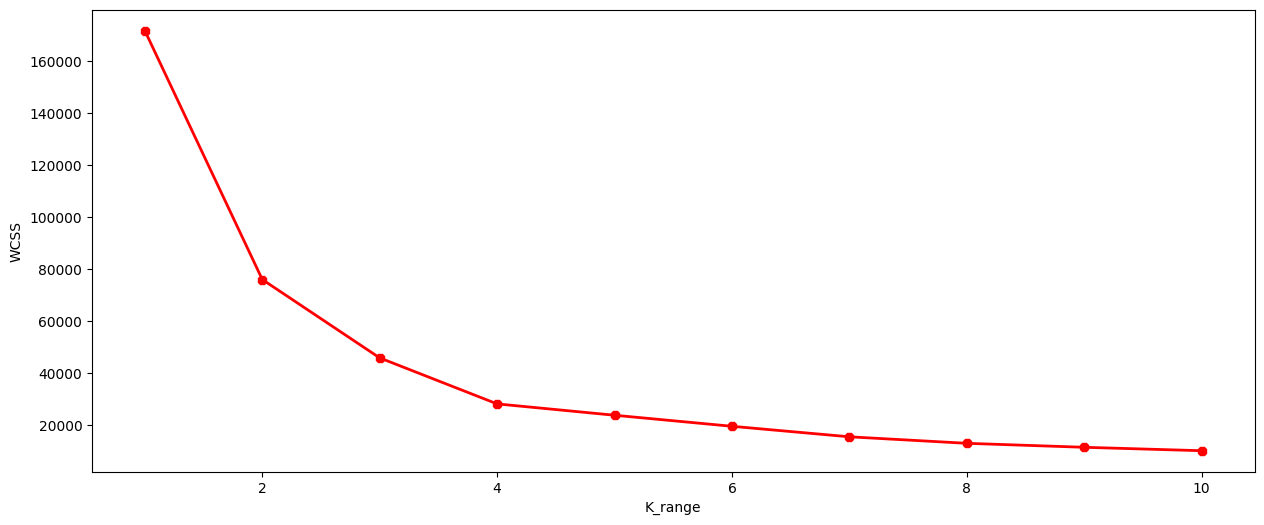

In [127]:
plt.figure(figsize=(15,6))
plt.plot(k_range,wcss,linewidth=2,color='red',marker='8')
plt.xlabel("K_range")
plt.ylabel("WCSS")
plt.show()

k value suitable for our data ==4  (el-bow method)

In [128]:
km=KMeans(n_clusters=4,random_state=0)
y_pred = km.fit_predict(x1)
y_pred

c:\Users\Nishanth S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [129]:
km.cluster_centers_

array([[43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617],
       [55.70833333, 48.22916667]])

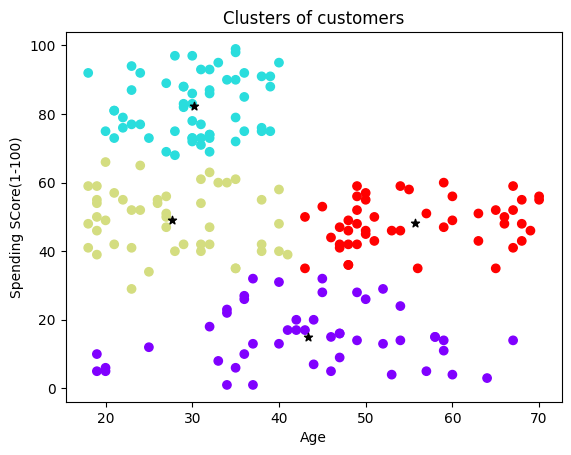

In [130]:
plt.scatter(x1[:,0],x1[:,1],c=km.labels_,cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel("Spending SCore(1-100)")
plt.show()

In [131]:
x2=data.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values
wcss=[]
k_range=range(1,11)
for k in k_range:
    km=KMeans(n_clusters=k,init='k-means++')
    km.fit(x2)
    wcss.append(km.inertia_)
    

c:\Users\Nishanth S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Nishanth S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Nishanth S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Nishanth S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

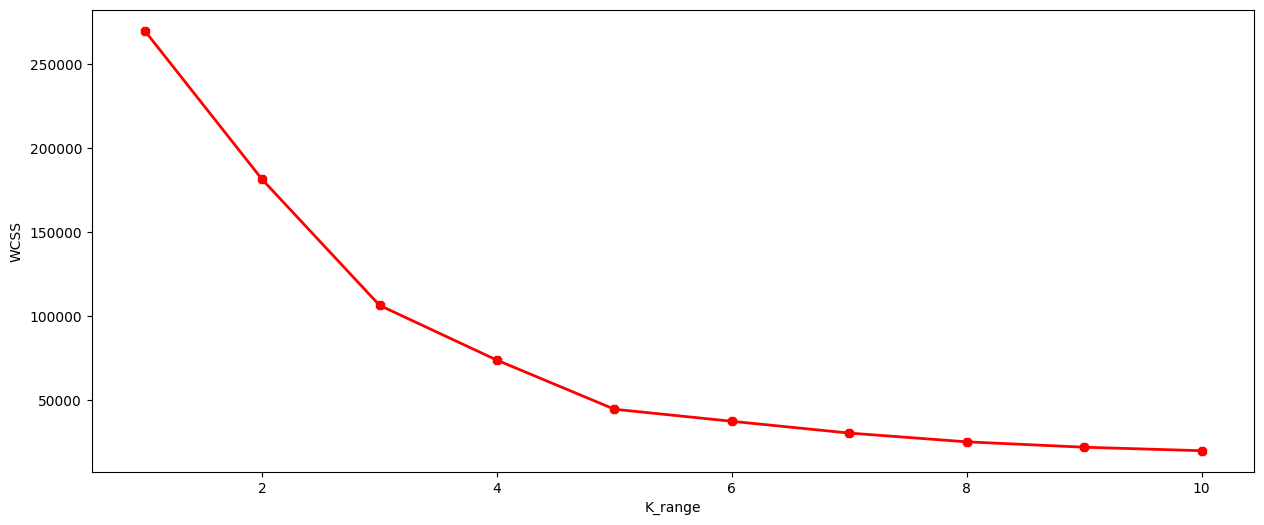

In [132]:
plt.figure(figsize=(15,6))
plt.plot(k_range,wcss,linewidth=2,color='red',marker='8')
plt.xlabel("K_range")
plt.ylabel("WCSS")
plt.show()

In [136]:
km=KMeans(n_clusters=5,random_state=0)
y_pred = km.fit_predict(x2)
y_pred

c:\Users\Nishanth S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [137]:
km.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

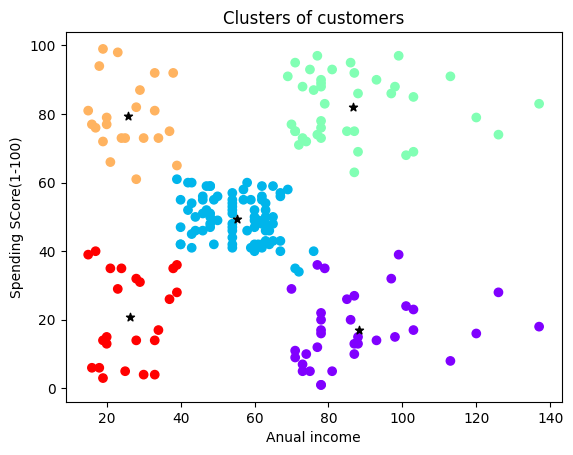

In [138]:
plt.scatter(x2[:,0],x2[:,1],c=km.labels_,cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*')
plt.title('Clusters of customers')
plt.xlabel('Annual income')
plt.ylabel("Spending SCore(1-100)")
plt.show()

In [139]:
x3=data.iloc[:,1:]
wcss=[]
k_range=range(1,11)
for k in k_range:
    km=KMeans(n_clusters=k,init='k-means++')
    km.fit(x3)
    wcss.append(km.inertia_)

c:\Users\Nishanth S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Nishanth S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Nishanth S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Nishanth S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

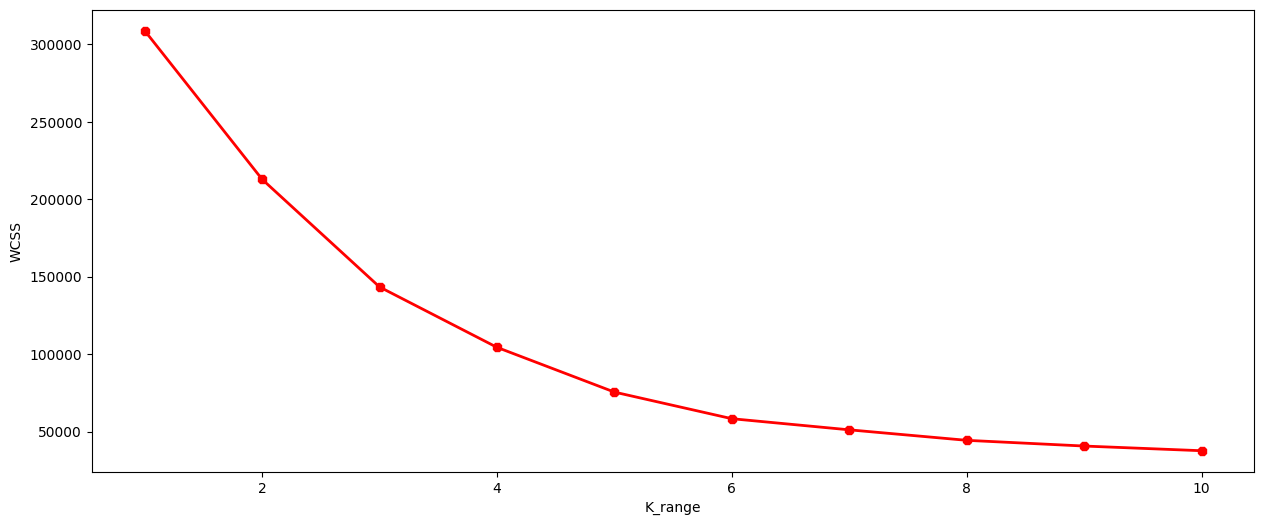

In [140]:
plt.figure(figsize=(15,6))
plt.plot(k_range,wcss,linewidth=2,color='red',marker='8')
plt.xlabel("K_range")
plt.ylabel("WCSS")
plt.show()

In [143]:
km=KMeans(n_clusters=5,random_state=0)
y_pred = km.fit_predict(x3)
y_pred

c:\Users\Nishanth S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [144]:
km.cluster_centers_

array([[45.2173913 , 26.30434783, 20.91304348],
       [32.69230769, 86.53846154, 82.12820513],
       [43.08860759, 55.29113924, 49.56962025],
       [40.66666667, 87.75      , 17.58333333],
       [25.52173913, 26.30434783, 78.56521739]])

In [145]:
data['cluster']=y_pred

In [146]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,0
1,Male,21,15,81,4
2,Female,20,16,6,0
3,Female,23,16,77,4
4,Female,31,17,40,0


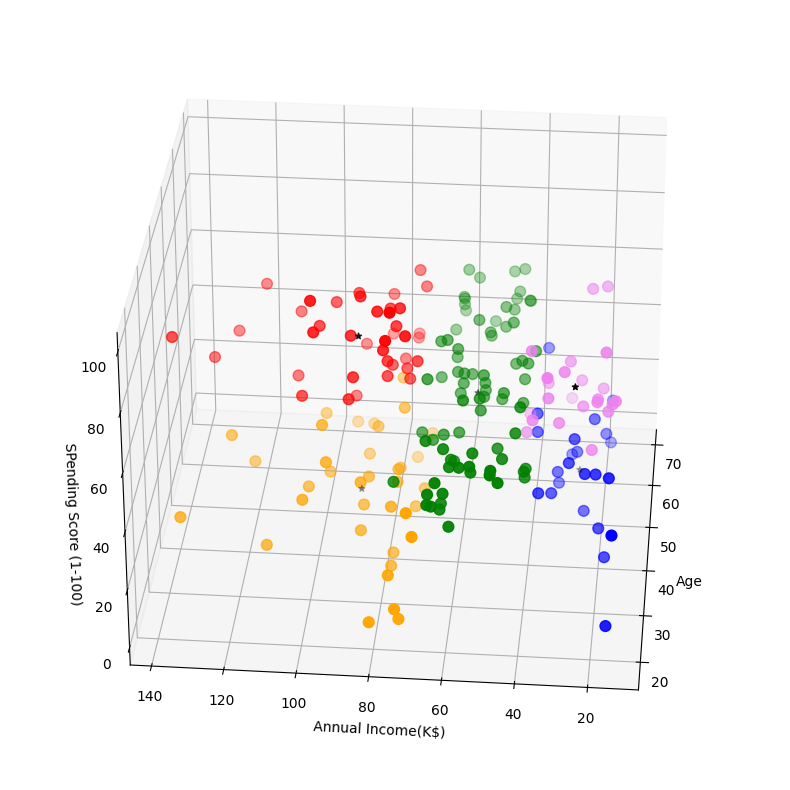

In [154]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(data.Age[data.cluster==0],data['Annual Income (k$)'][data.cluster==0],data['Spending Score (1-100)'][data.cluster==0],c='blue',s=60)
ax.scatter(data.Age[data.cluster==1],data['Annual Income (k$)'][data.cluster==1],data['Spending Score (1-100)'][data.cluster==1],c='red',s=60)
ax.scatter(data.Age[data.cluster==2],data['Annual Income (k$)'][data.cluster==2],data['Spending Score (1-100)'][data.cluster==2],c='green',s=60)
ax.scatter(data.Age[data.cluster==3],data['Annual Income (k$)'][data.cluster==3],data['Spending Score (1-100)'][data.cluster==3],c='orange',s=60)
ax.scatter(data.Age[data.cluster==4],data['Annual Income (k$)'][data.cluster==4],data['Spending Score (1-100)'][data.cluster==4],c='violet',s=60)
ax.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],c='black',marker='*')
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income(K$)")
ax.set_zlabel("SPending Score (1-100)")
plt.show()
